<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [84]:
# Imports
import warnings

warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
from dataset import Dataset
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns; sns.set()
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, LeaveOneOut, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from matplotlib import pyplot

In [85]:
url = '/Users/renero/Documents/IE/IE 2019/IE 2019 O1/Lessons/8.LDA QDA/default.csv'
df = Dataset(url, sep=';')
df.set_target('default').scale().fix_skewness()

replacement = {'Yes': 1, 'No': 0}
df.target.replace(replacement, inplace=True)
df.drop_columns('student')
df.summary()

Features Summary (all):
'balance': float64    Min.(-1.8) 1stQ(-0.7) Med.(-0.0) Mean(-0.0) 3rdQ(0.65) Max.(3.27)
'income' : float64    Min.(-2.5) 1stQ(-0.9) Med.(0.07) Mean(-0.0) 3rdQ(0.76) Max.(2.91)
'default': float64    Min.(0) 1stQ(0.0) Med.(0.0) Mean(0.03) 3rdQ(0.0) Max.(1)


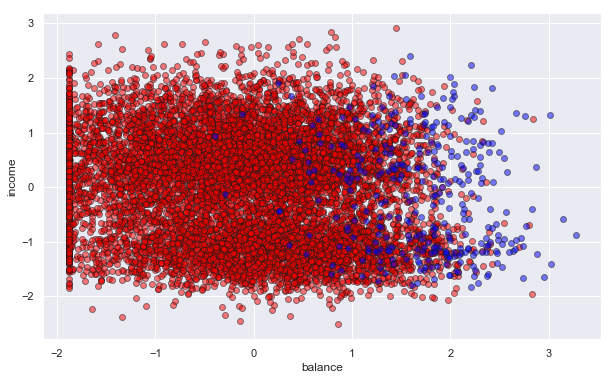

In [83]:
plt.figure(figsize=(10,6))

tp = (y == y_pred)  # True Positive
tp0, tp1 = tp[y == 0], tp[y == 1]
X0, X1 = X[y == 0], X[y == 1]
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]

alpha = 0.5

# class 0: dots
plt.plot(X0[:, 0], X0[:, 1], 'o', alpha=alpha,
         color='red', markeredgecolor='k')

# class 1: dots
plt.plot(X1[:, 0], X1[:, 1], 'o', alpha=alpha,
         color='blue', markeredgecolor='k')
plt.xlabel('balance')
plt.ylabel('income')

plt.show();

In [70]:
# Split the dataset.
X, y = df.split()
lda = LinearDiscriminantAnalysis().fit(X.train, y.train)

# Evaluate using cross-validation, what is the performance in training.
accuracies = cross_val_score(lda, X=X.train, y=y.train, scoring='accuracy')
print('Avg. Acc (training): {:.2f} +/- {:.2f}'.format(
    np.mean(accuracies), np.std(accuracies)))

# Finally, evaluate my model in test.
test_score = accuracy_score(y.test, lda.predict(X.test))
print('Acc (test): {:.2f}'.format(test_score))

Avg. Acc (training): 0.97 +/- 0.00
Acc (test): 0.97


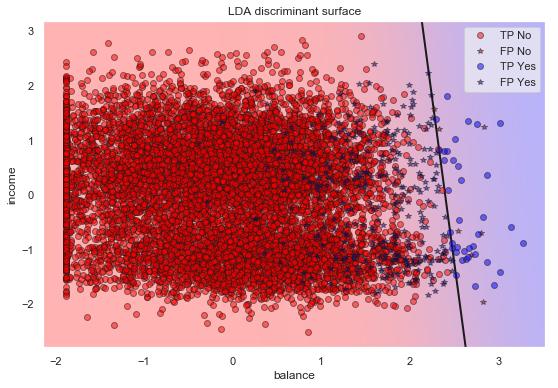

In [91]:
X = df.features.values
y = df.target.values
y_pred = lda.predict(X)

plt.figure(figsize=(9,6))

tp = (y == y_pred)  # True Positive
tp0, tp1 = tp[y == 0], tp[y == 1]
X0, X1 = X[y == 0], X[y == 1]
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]

alpha = 0.5

# class 0: dots
plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
         color='red', markeredgecolor='k', label='TP No')
plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
         color='#990000', markeredgecolor='k', label='FP No')

# class 1: dots
plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
         color='blue', markeredgecolor='k', label="TP Yes")
plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
         color='#000099', markeredgecolor='k', label='FP Yes')
    
# class 0 and 1 : areas
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
               norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')
plt.title('LDA discriminant surface')
plt.xlabel('balance')
plt.ylabel('income')
plt.legend()

plt.show();

In [86]:
# Split the dataset.
X, y = df.split()
qda = QuadraticDiscriminantAnalysis().fit(X.train, y.train)

# Evaluate using cross-validation, what is the performance in training.
accuracies = cross_val_score(qda, X=X.train, y=y.train, scoring='accuracy')
print('Avg. Acc (training): {:.2f} +/- {:.2f}'.format(
    np.mean(accuracies), np.std(accuracies)))

# Finally, evaluate my model in test.
test_score = accuracy_score(y.test, qda.predict(X.test))
print('Acc (test): {:.2f}'.format(test_score))

Avg. Acc (training): 0.97 +/- 0.00
Acc (test): 0.97


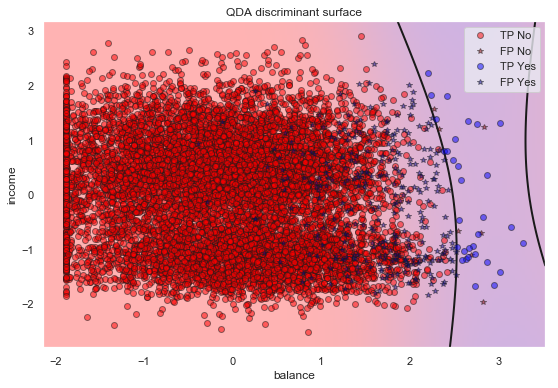

In [89]:
X = df.features.values
y = df.target.values
y_pred = qda.predict(X)

plt.figure(figsize=(9,6))

tp = (y == y_pred)  # True Positive
tp0, tp1 = tp[y == 0], tp[y == 1]
X0, X1 = X[y == 0], X[y == 1]
X0_tp, X0_fp = X0[tp0], X0[~tp0]
X1_tp, X1_fp = X1[tp1], X1[~tp1]

alpha = 0.5

# class 0: dots
plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
         color='red', markeredgecolor='k', label='TP No')
plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
         color='#990000', markeredgecolor='k', label='FP No')

# class 1: dots
plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
         color='blue', markeredgecolor='k', label="TP Yes")
plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
         color='#000099', markeredgecolor='k', label='FP Yes')
    
# class 0 and 1 : areas
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
               norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

plt.title('QDA discriminant surface')
plt.xlabel('balance')
plt.ylabel('income')
plt.legend()
plt.show();

In [96]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[9660,    7],
       [ 296,   37]])

In [119]:
def print_cm(cm, labels, hide_zeroes=False, 
             hide_diagonal=False, 
             hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [6])  # 5 is value length
    empty_cell = " " * columnwidth
    
    fst_empty_cell = (columnwidth-3)//2 * " " + "t/p" + (columnwidth-3)//2 * " "
    
    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES
    
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
        
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [120]:
print_cm(confusion_matrix(y, y_pred), ['No', 'Yes'])

      t/p      No    Yes 
        No 9660.0    7.0 
       Yes  296.0   37.0 
